# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url ="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
count = 0
weather_dicty = { "City" : [], "Lat" : [], "Lng" : [], "Max Temp" : [], "Humidity" : [], "Cloudiness" : [],
                "Wind Speed" : [], "Country" : [], "Date" : []}
print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    count += 1 
    try:
        response = requests.get(query_url + city).json()
        weather_dicty["City"].append(response["name"])
        weather_dicty["Lat"].append(response["coord"]["lat"])
        weather_dicty["Lng"].append(response["coord"]["lon"])
        weather_dicty["Max Temp"].append(response["main"]["temp_max"])
        weather_dicty["Humidity"].append(response["main"]["humidity"])
        weather_dicty["Cloudiness"].append(response["clouds"]["all"])
        weather_dicty["Wind Speed"].append(response["wind"]["speed"])
        weather_dicty["Country"].append(response["sys"]["country"])
        weather_dicty["Date"].append(response["dt"])
        print(f"Processing data for request number {count}, {city}")
    except KeyError: 
        print("City information not available, skipping to next city")
print("-----------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
------------------------
Processing data for request number 1, blacksburg
Processing data for request number 2, torbay
Processing data for request number 3, hobart
Processing data for request number 4, albany
Processing data for request number 5, portland
Processing data for request number 6, ushuaia
Processing data for request number 7, hermanus
Processing data for request number 8, naze
Processing data for request number 9, busselton
Processing data for request number 10, kontagora
Processing data for request number 11, atambua
Processing data for request number 12, oriximina
Processing data for request number 13, hambantota
Processing data for request number 14, aklavik
Processing data for request number 15, rikitea
City information not available, skipping to next city
City information not available, skipping to next city
Processing data for request number 18, sungaipenuh
Processing data for request number 19, mar del plata
City information not available, sk

Processing data for request number 167, cefalu
Processing data for request number 168, matara
Processing data for request number 169, kalevala
Processing data for request number 170, forbes
Processing data for request number 171, severo-kurilsk
Processing data for request number 172, belmonte
Processing data for request number 173, korla
Processing data for request number 174, clyde river
Processing data for request number 175, ewa beach
Processing data for request number 176, half moon bay
Processing data for request number 177, waipawa
Processing data for request number 178, fairbanks
Processing data for request number 179, opuwo
Processing data for request number 180, elizabeth city
Processing data for request number 181, longyearbyen
City information not available, skipping to next city
Processing data for request number 183, bethel
Processing data for request number 184, husavik
Processing data for request number 185, fomboni
City information not available, skipping to next city
P

City information not available, skipping to next city
Processing data for request number 333, robe
Processing data for request number 334, jackson
Processing data for request number 335, luderitz
Processing data for request number 336, buchanan
Processing data for request number 337, batman
Processing data for request number 338, san cristobal
Processing data for request number 339, petropavlovsk-kamchatskiy
Processing data for request number 340, sorong
Processing data for request number 341, samarai
Processing data for request number 342, riyadh
Processing data for request number 343, bocanda
Processing data for request number 344, kisangani
Processing data for request number 345, paso del macho
Processing data for request number 346, hofn
Processing data for request number 347, buturlinovka
Processing data for request number 348, praia da vitoria
Processing data for request number 349, conakry
Processing data for request number 350, cap malheureux
Processing data for request number 

Processing data for request number 498, saint-louis
Processing data for request number 499, hukay
Processing data for request number 500, teplyk
Processing data for request number 501, sibu
Processing data for request number 502, bathsheba
Processing data for request number 503, henties bay
City information not available, skipping to next city
Processing data for request number 505, ludhiana
Processing data for request number 506, ayan
Processing data for request number 507, palestine
Processing data for request number 508, ballina
Processing data for request number 509, ust-kuyga
Processing data for request number 510, bilibino
Processing data for request number 511, dakar
City information not available, skipping to next city
City information not available, skipping to next city
Processing data for request number 514, linxia
Processing data for request number 515, ziro
Processing data for request number 516, bacolod
Processing data for request number 517, lavrentiya
Processing data fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
weather_data = pd.DataFrame(weather_dicty)
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Blacksburg,37.23,-80.41,46.40,65,90,12.75,US,1604098792
1,Torbay,47.67,-52.73,36.00,59,75,17.22,CA,1604098749
2,Hobart,-42.88,147.33,62.01,67,20,6.93,AU,1604098641
3,Albany,42.60,-73.97,33.01,88,79,3.29,US,1604098678
4,Portland,45.52,-122.68,62.01,63,75,5.82,US,1604098449


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,5.370000e+02
mean,19.021844,16.849460,57.723222,73.646182,52.791434,7.825847,1.604099e+09
std,33.488682,88.466114,21.900881,20.284947,39.329754,5.988088,9.976733e+01
min,-54.800000,-179.170000,-11.420000,12.000000,0.000000,0.670000,1.604098e+09
25%,-8.120000,-58.740000,45.860000,63.000000,6.000000,3.360000,1.604099e+09
50%,22.290000,18.210000,64.000000,79.000000,63.000000,6.110000,1.604099e+09
75%,46.620000,88.400000,75.240000,90.000000,90.000000,10.290000,1.604099e+09
max,78.220000,179.320000,88.920000,100.000000,100.000000,34.450000,1.604099e+09


In [11]:
outlier_counts = len(weather_data[weather_data["Humidity"] > 100])
outlier_counts

0

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

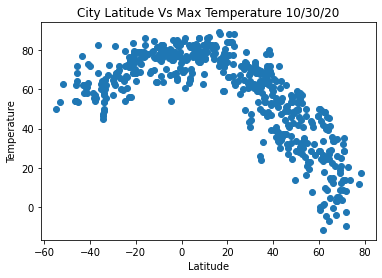

In [17]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude Vs Max Temperature 10/30/20')
plt.show()

## Latitude vs. Humidity Plot

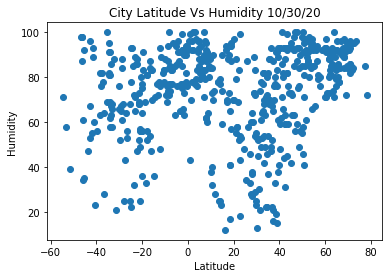

In [18]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude Vs Humidity 10/30/20')
plt.show()

## Latitude vs. Cloudiness Plot

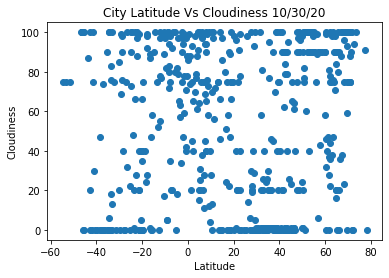

In [19]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude Vs Cloudiness 10/30/20')
plt.show()

## Latitude vs. Wind Speed Plot

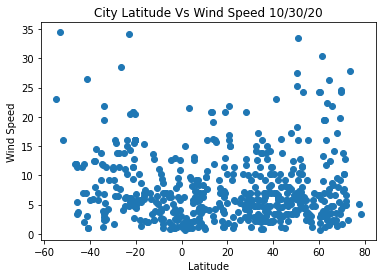

In [20]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude Vs Wind Speed 10/30/20')
plt.show()

## Linear Regression

In [27]:
northern_hem_data = weather_data[weather_data["Lat"] >= 0 ]
southern_hem_data = weather_data[weather_data["Lat"] < 0 ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7300346590798821


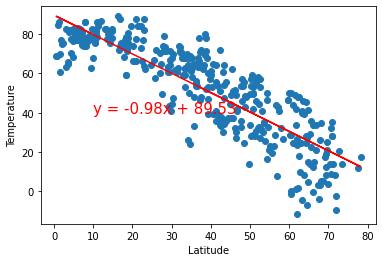

In [34]:
x_values = northern_hem_data["Lat"]
y_values = northern_hem_data["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

In [1]:
print(f"This linear regression model of latitude compared with max temperature in the Northern Hemisphere shows us that as latitude increases from 0, the temperature typically lowers.")

This linear regression model of latitude compared with max temperature in the Northern Hemisphere shows us that as latitude increases from 0, the temperature typically lowers.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.42937552129407675


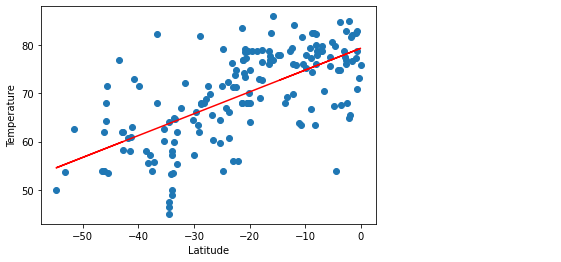

In [37]:
x_values = southern_hem_data["Lat"]
y_values = southern_hem_data["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

In [2]:
print(f"This linear regression model of latitude compared with max temperature in the Southern Hemisphere shows us a wide variation of max temperatures across our range of latitudes. There is not a significant correlation between max tempature and latitude.")

This linear regression model of latitude compared with max temperature in the Southern Hemisphere shows us a wide variation of max temperatures across our range of latitudes. There is not a significant correlation between max tempature and latitude.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05647331273323706


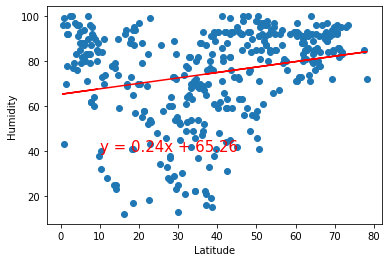

In [33]:
x_values = northern_hem_data["Lat"]
y_values = northern_hem_data["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

In [4]:
print(f"This linear regression model of latitude compared with humidity in the Northern Hemisphere does not show any correlation between the two variables.")

This linear regression model of latitude compared with humidity in the Northern Hemisphere does not show any correlation between the two variables.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07803184021920036


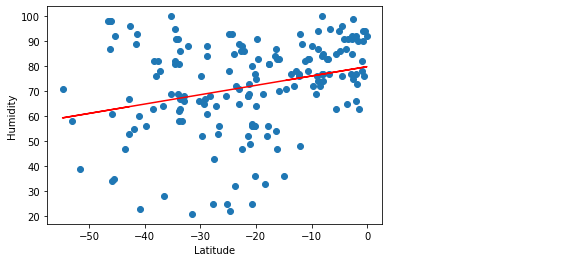

In [38]:
x_values = southern_hem_data["Lat"]
y_values = southern_hem_data["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

In [6]:
print(f"This linear regression model of latitude compared with humidity in the Southern Hemisphere does not show any correlation between the two variables.")

This linear regression model of latitude compared with humidity in the Southern Hemisphere does not show any correlation between the two variables.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02011319817349726


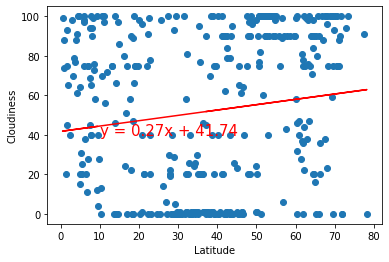

In [35]:
x_values = northern_hem_data["Lat"]
y_values = northern_hem_data["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

In [9]:
print(f"This linear regression model of latitude compared with cloudiness in the Northern Hemisphere does not show any correlation between the two variables.")

This linear regression model of latitude compared with cloudiness in the Northern Hemisphere does not show any correlation between the two variables.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04898904421983618


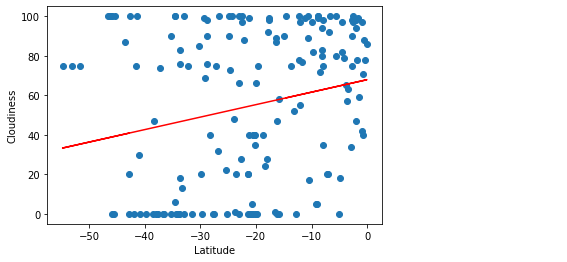

In [39]:
x_values = southern_hem_data["Lat"]
y_values = southern_hem_data["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

In [10]:
print(f"This linear regression model of latitude compared with cloudiness in the Northern Hemisphere does not show any correlation between the two variables.")

This linear regression model of latitude compared with cloudiness in the Northern Hemisphere does not show any correlation between the two variables.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01452918201864988


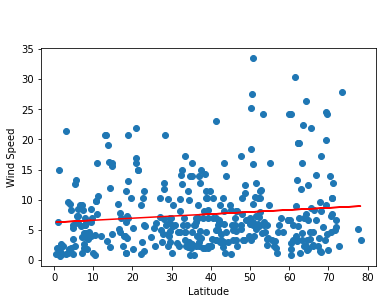

In [36]:
x_values = northern_hem_data["Lat"]
y_values = northern_hem_data["Wind Speed"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

In [11]:
print(f"This linear regression model of latitude compared with wind speed in the Northern Hemisphere does not show any correlation between the two variables.")

This linear regression model of latitude compared with wind speed in the Northern Hemisphere does not show any correlation between the two variables.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.101873827990925


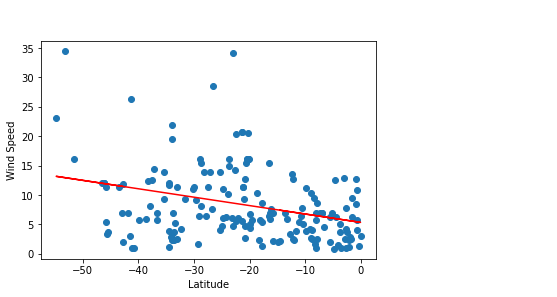

In [40]:
x_values = southern_hem_data["Lat"]
y_values = southern_hem_data["Wind Speed"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

In [12]:
print(f"This linear regression model of latitude compared with wind speed in the Southern Hemisphere does not show any correlation between the two variables.")

This linear regression model of latitude compared with wind speed in the Southern Hemisphere does not show any correlation between the two variables.
